In [28]:
import numpy as np

# Generate random noise
noise = np.random.rand(1000, 1)

# Generate random weights and bias
weights = np.random.rand(1)
bias = np.random.rand(1)

# Generate input features
X = np.random.rand(1000, 28, 28, 1)

# Generate labels by adding noise to a linear function
y = weights * X 
y = np.sum(y, axis=(1,2)) + bias + noise



In [46]:
weights, bias, y.shape

(array([0.00052846]), array([0.32077143]), (1000, 1))

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [31]:
X_train.shape

(800, 28, 28, 1)

In [32]:
y_train.shape

(800, 1)

In [33]:
X_val.shape, y_val.shape

((200, 28, 28, 1), (200, 1))

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                401472    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 401,857
Trainable params: 401,857
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Define a model checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'model.ckpt', save_best_only=True, monitor='val_loss', mode='min', save_freq='epoch'
)

# Train the model with the checkpoint callback
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[checkpoint_callback])


Epoch 1/10
25/25 [==============================] - 0s 8ms/step - loss: 0.2356 - val_loss: 0.1022
INFO:tensorflow:Assets written to: model.ckpt/assets
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0971 - val_loss: 0.1005
INFO:tensorflow:Assets written to: model.ckpt/assets
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0860 - val_loss: 0.0933
INFO:tensorflow:Assets written to: model.ckpt/assets
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0902 - val_loss: 0.0867
INFO:tensorflow:Assets written to: model.ckpt/assets
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0771 - val_loss: 0.0864
INFO:tensorflow:Assets written to: model.ckpt/assets
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0810 - val_loss: 0.1056
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0769 - val_loss: 0.1294
Epoch 8/10
25/25 [==============================]

<AxesSubplot:>

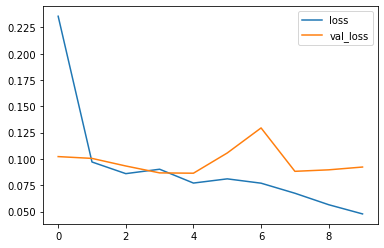

In [43]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist.plot()
